In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns


In [2]:
df = pd.read_csv('Cleaned-data-vc.csv', index_col = 0)

In [3]:
print(df.keys())

Index(['vaxView', 'year', 'value', 'lowerLimit', 'upperLimit', 'sampleSize',
       'confidenceInterval', 'demographicClass', 'upperError', 'lowerError'],
      dtype='object')


In [4]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['vaxView', 'lowerLimit', 'upperLimit', 'sampleSize', 'confidenceInterval','demographicClass','upperError','lowerError']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,vaxView,year,value,lowerLimit,upperLimit,sampleSize,confidenceInterval,demographicClass,upperError,lowerError
676,0.000000,2016,75.8,0.674919,0.810251,0.012329,0.232394,0.416667,0.245211,0.226415
1097,0.000000,2001,93.4,0.904198,0.958561,0.011280,0.091549,0.000000,0.091954,0.110063
1045,0.666667,2017,44.9,0.240043,0.607415,0.000393,0.647887,0.833333,0.716475,0.525157
1396,0.000000,2006,88.2,0.817008,0.924755,0.004722,0.179577,0.416667,0.172414,0.201258
1403,0.666667,2016,34.3,0.247578,0.359869,0.011455,0.204225,0.333333,0.252874,0.169811
...,...,...,...,...,...,...,...,...,...,...
56,0.000000,2005,88.8,0.809473,0.935660,0.005815,0.207746,0.166667,0.187739,0.242138
385,0.666667,2009,45.4,0.240043,0.617230,0.000481,0.665493,0.333333,0.731801,0.540881
86,0.000000,2008,93.9,0.891281,0.968375,0.009138,0.126761,0.333333,0.107280,0.163522
876,0.000000,2013,70.5,0.571582,0.788441,0.002842,0.373239,0.083333,0.371648,0.361635


In [5]:
# Separating the training set into target and predictor variables

y_train = df_train.pop('value')
x_train = df_train


In [6]:
# Building a model with all the variables

x_train_lin_model = sm.add_constant(x_train)

limmodel_full = sm.OLS(y_train, x_train_lin_model).fit()

limmodel_full.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.462e+23
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        11:54:37   Log-Likelihood:                 25605.
No. Observations:                1265   AIC:                        -5.119e+04
Df Residuals:                    1256   BIC:                        -5.115e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.9280   3.96e-09   1.75e+09      0.000       6.928       6.928
vaxView             3.197e-14   4.94e-11      0.001      0.999   -9.68e-11    9.69e-11
year               -1.955e-13   1.98e-12     -0.099      0.921   -4.07e-12    3.68e-12
lowerLimit            45.1510   1.76e-10   2.56e+11      0.000      45.151      45.151
upperLimit            47.1322    2.1e-10   2.25e+11      0.000      47.132      47.132
sampleSize          1.776e-14   1.78e-10   9.96e-05      1.000    -3.5e-10     3.5e-10
confidenceInterval -2.061e-13   1.22e-09     -0.000      1.000   -2.39e-09    2.39e-09
demographicClass    2.465e-14   4.93e-11      0.001      1.000   -9.66e-11    9.67e-11
upperError           -13.4149   7.83e-10  -1.71e+10      0.000     -13.415     -13.415
lowerError            15.4554   4.63e-10   3.34e+10      0.000      15.455      15.455
==============================================================================
Omnibus:                      363.125   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.132
Skew:                          -0.290   Prob(JB):                     4.85e-17
Kurtosis:                       1.957   Cond. No.                     2.09e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
# The model fitting indicates a strong multicollinearity. We shall use VIF to find the issues.
 # Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,upperLimit,1.808729e+08
2,lowerLimit,1.328683e+08
8,lowerError,2.728884e+06
7,upperError,1.610486e+06
5,confidenceInterval,2.623500e+02
0,vaxView,1.440000e+00
1,year,1.300000e+00
4,sampleSize,1.210000e+00
6,demographicClass,1.090000e+00


In [8]:
x = x_train.drop('upperLimit', 1,)

# Build a fitted model after dropping the variable
x_train_lm1 = sm.add_constant(x)

lr_1 = sm.OLS(y_train, x_train_lm1).fit()

# Printing the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.734e+23
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        11:54:45   Log-Likelihood:                 25764.
No. Observations:                1265   AIC:                        -5.151e+04
Df Residuals:                    1256   BIC:                        -5.146e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.9000   3.49

In [9]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,confidenceInterval,926.65
6,upperError,425.90
7,lowerError,191.79
1,year,68.06
2,lowerLimit,28.99
5,demographicClass,2.06
0,vaxView,1.46
3,sampleSize,1.30


In [10]:
x = x.drop('confidenceInterval', 1,)

# Build a fitted model after dropping the variable
x_train_lm2 = sm.add_constant(x)

lr_2 = sm.OLS(y_train, x_train_lm2).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.059e+23
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        11:55:07   Log-Likelihood:                 25810.
No. Observations:                1265   AIC:                        -5.160e+04
Df Residuals:                    1257   BIC:                        -5.156e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.9000   3.37e-09  

In [11]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,year,42.66
2,lowerLimit,23.50
5,upperError,20.85
6,lowerError,12.89
4,demographicClass,2.06
0,vaxView,1.46
3,sampleSize,1.24


In [12]:
x = x.drop('year', 1,)

# Build a fitted model after dropping the variable
x_train_lm3 = sm.add_constant(x)

lr_3 = sm.OLS(y_train, x_train_lm3).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.289e+32
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        11:55:20   Log-Likelihood:                 37745.
No. Observations:                1265   AIC:                        -7.548e+04
Df Residuals:                    1258   BIC:                        -7.544e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.9000   4.89e-15  

In [13]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,lowerError,11.24
4,upperError,9.78
1,lowerLimit,2.84
3,demographicClass,2.03
0,vaxView,1.34
2,sampleSize,1.14


In [14]:
x = x.drop('lowerError', 1,)

# Build a fitted model after dropping the variable
x_train_lm4 = sm.add_constant(x)

lr_4 = sm.OLS(y_train, x_train_lm4).fit()

# Printing the summary of the model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.640e+04
Date:                Wed, 05 May 2021   Prob (F-statistic):               0.00
Time:                        11:55:28   Log-Likelihood:                -2988.1
No. Observations:                1265   AIC:                             5988.
Df Residuals:                    1259   BIC:                             6019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0926      0.440  

In [15]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,upperError,2.56
1,lowerLimit,2.31
3,demographicClass,2.02
0,vaxView,1.31
2,sampleSize,1.11


Text(0.5, 0, 'Errors')

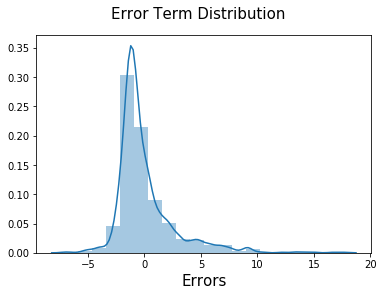

In [16]:
y_train_price = lr_4.predict(x_train_lm4)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Term Distribution', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 15)     

In [17]:
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['vaxView', 'lowerLimit', 'upperLimit', 'sampleSize', 'confidenceInterval','demographicClass','upperError','lowerError']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


y_test = df_test.pop('value')
x_test = df_test

# Adding constant variable to test dataframe
x_test_m4 = sm.add_constant(x_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
x_test_m4 = x_test_m4.drop(["lowerLimit", "confidenceInterval", "year", "lowerError"], axis = 1)

# Making predictions using the final model
y_pred_m4 = lr_4.predict(x_test_m4)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m4)

0.3177605775379303